# 03. Exploratory Data Analysis (EDA): Univariate & Bivariate Analysis

**Objective:** Perform univariate and bivariate EDA on the preprocessed dataset to uncover distributions, identify patterns, and explore relationships with the target variable `is_severe_accident`.

**PRD References:** 2.2.2, 3.1.4; **FR2**; **NFR3**

## 1. Setup and Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

## 2. Load Preprocessed Data

In [5]:
data_path = '../data/processed/preprocessed_data.csv'
df = pd.read_csv(data_path)
print(f'Data loaded: {df.shape[0]} rows, {df.shape[1]} columns')

Data loaded: 22072 rows, 42 columns


### 2.1. Quick Peek

In [6]:
df.head()

,SEVERITY,Y,X,DATETIME_UTC,hour,day_of_week,day,month,year,is_weekend,season,ROAD_EDSA,MAIN_CAUSE_Human error,MAIN_CAUSE_Other (see description),MAIN_CAUSE_Road defect,MAIN_CAUSE_Unknown,MAIN_CAUSE_Vehicle defect,COLLISION_TYPE_Angle Impact,COLLISION_TYPE_Head-On,COLLISION_TYPE_Hit Object,COLLISION_TYPE_Multiple,COLLISION_TYPE_No Collision Stated,COLLISION_TYPE_Rear-End,COLLISION_TYPE_Self-Accident,COLLISION_TYPE_Side Swipe,WEATHER_Unknown,WEATHER_clear-day,WEATHER_clear-night,WEATHER_cloudy,WEATHER_fog,WEATHER_partly-cloudy-day,WEATHER_partly-cloudy-night,WEATHER_rain,LIGHT_Unknown,LIGHT_day,LIGHT_dusk,LIGHT_night,REPORTING_AGENCY_MMDA Metrobase,REPORTING_AGENCY_MMDA Road Safety Unit,REPORTING_AGENCY_Other,desc_word_count,desc_contains_collision
0,Property,14.657714,121.019788,2014-06-30 05:40:00,5,0,30,6,2014,False,Summer,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,30,1
1,Property,14.657714,121.019788,2014-03-17 01:00:00,1,0,17,3,2014,False,Spring,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,38,1
2,Injury,14.657714,121.019788,2013-11-26 02:00:00,2,1,26,11,2013,False,Fall,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,30,1
3,Property,14.657714,121.019788,2013-10-26 13:00:00,13,5,26,10,2013,True,Fall,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,31,1
4,Injury,14.657706,121.019660,2013-06-26 23:30:00,23,2,26,6,2013,False,Summer,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,32,1


## 3. Univariate Analysis

### 3.1. Numerical Features

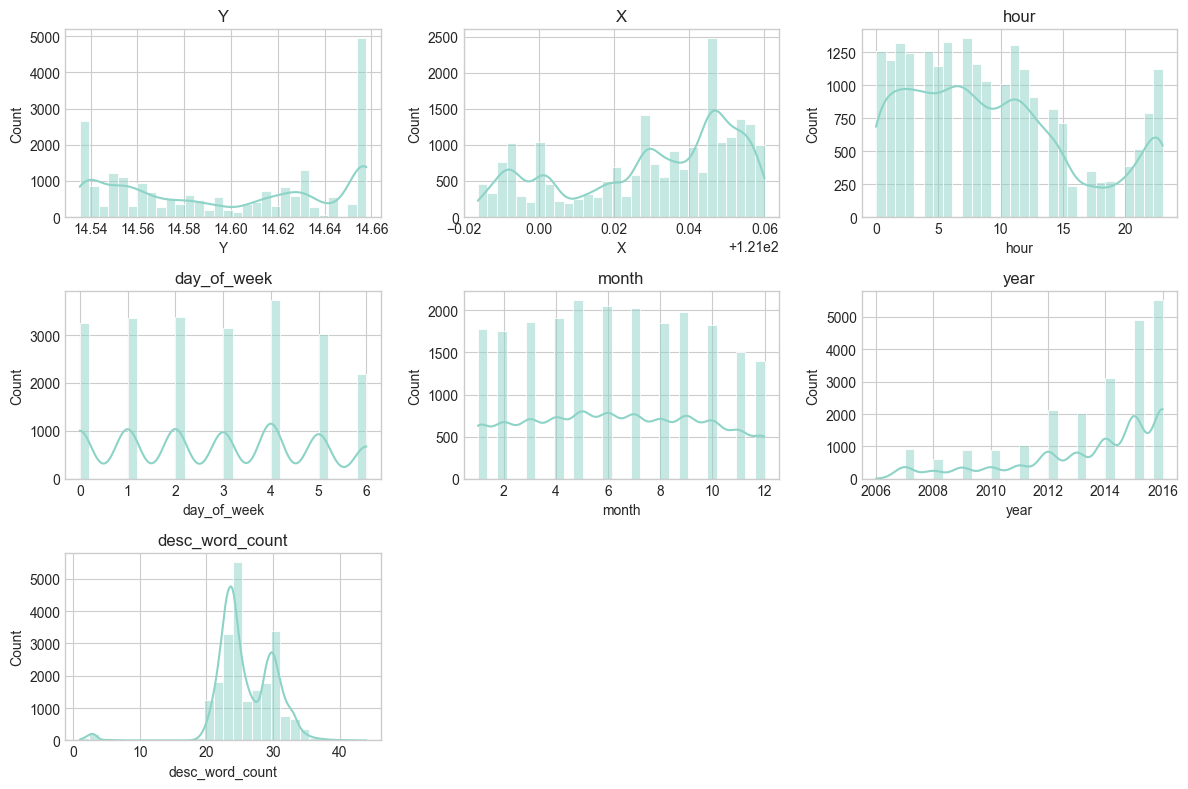

In [7]:
num_cols = ['Y', 'X', 'hour', 'day_of_week', 'month', 'year', 'desc_word_count']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Observations:**
- Distributions of continuous variables, presence of skewness or outliers.
- Note any unusual patterns or ranges.

### 3.2. Categorical Features

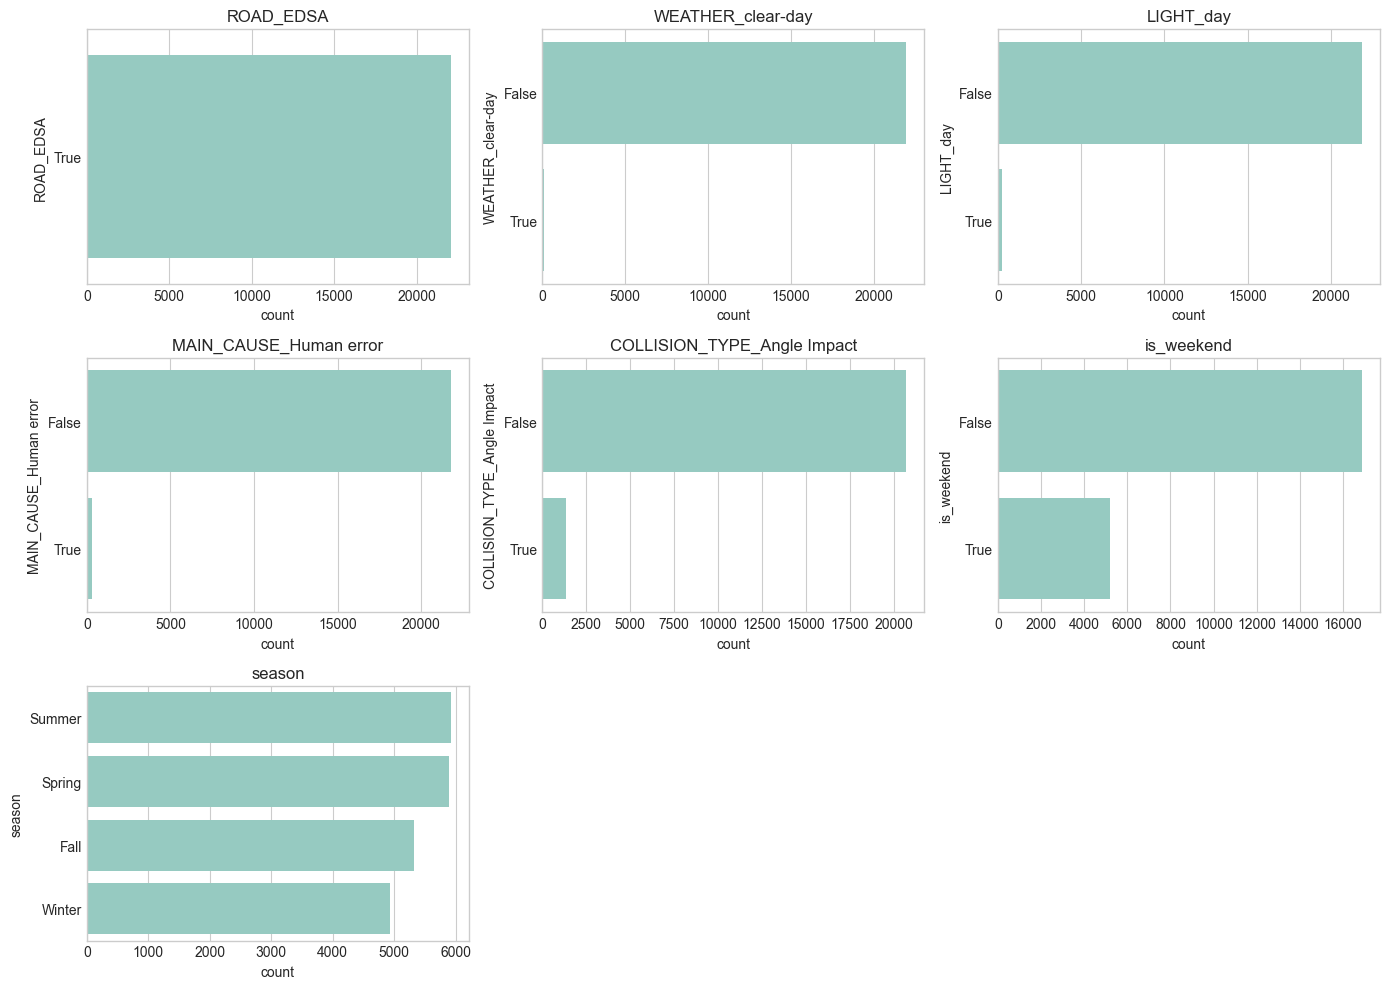

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot
cat_cols = [
    'ROAD_EDSA',  # Corrected column name
    'WEATHER_clear-day',  # Example corrected column name
    'LIGHT_day',  # Example corrected column name
    'MAIN_CAUSE_Human error',  # Corrected column name
    'COLLISION_TYPE_Angle Impact',  # Corrected column name
    'is_weekend', 
    'season'
]

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through each categorical column and create a subplot
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)  # Create a count plot
    plt.title(col)  # Set the title for the subplot
    plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plots
plt.show()


**Observations:**
- Frequency of categories, dominance of specific values.
- Identify rare categories.

## 4. Bivariate Analysis vs. Target (`is_severe_accident`)

### 4.1. Numerical Features vs Target

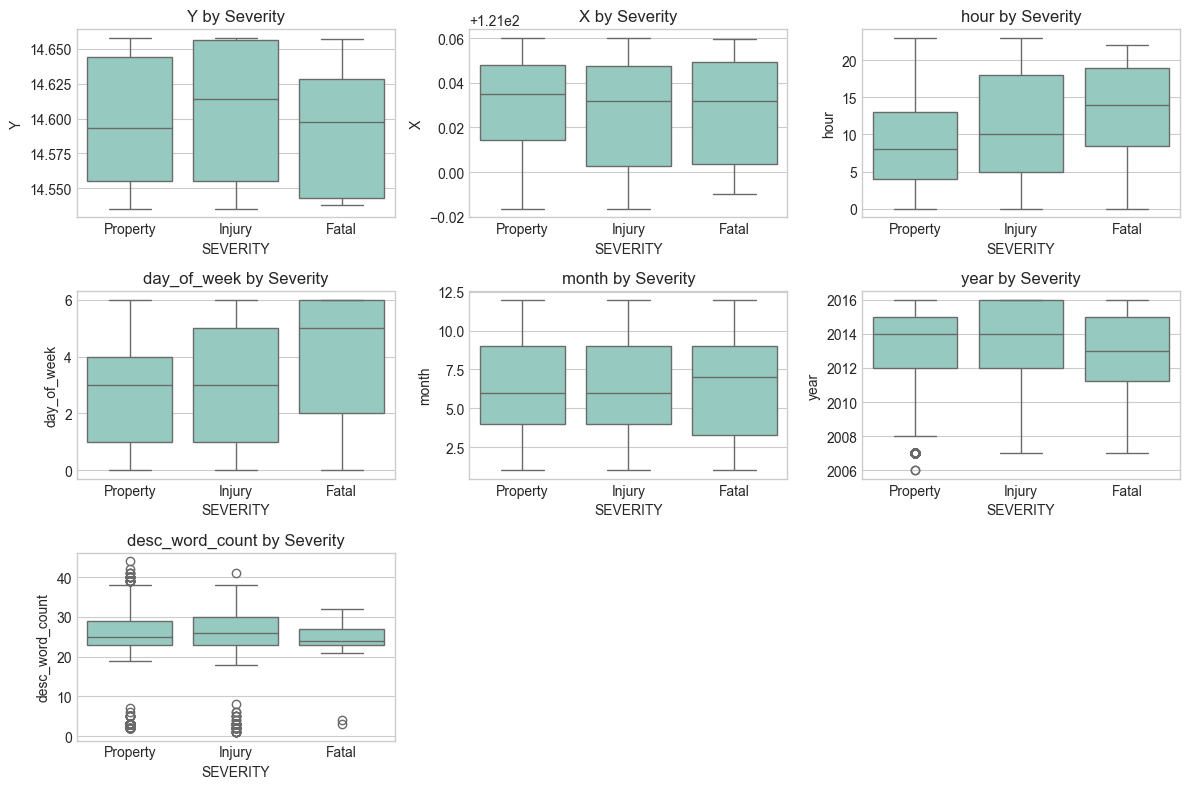

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='SEVERITY', y=col, data=df)
    plt.title(f'{col} by Severity')
plt.tight_layout()
plt.show()

**Observations:**
- Compare distributions of numeric features across severity classes.
- Note features with clear separation.

### 4.2. Categorical Features vs Target

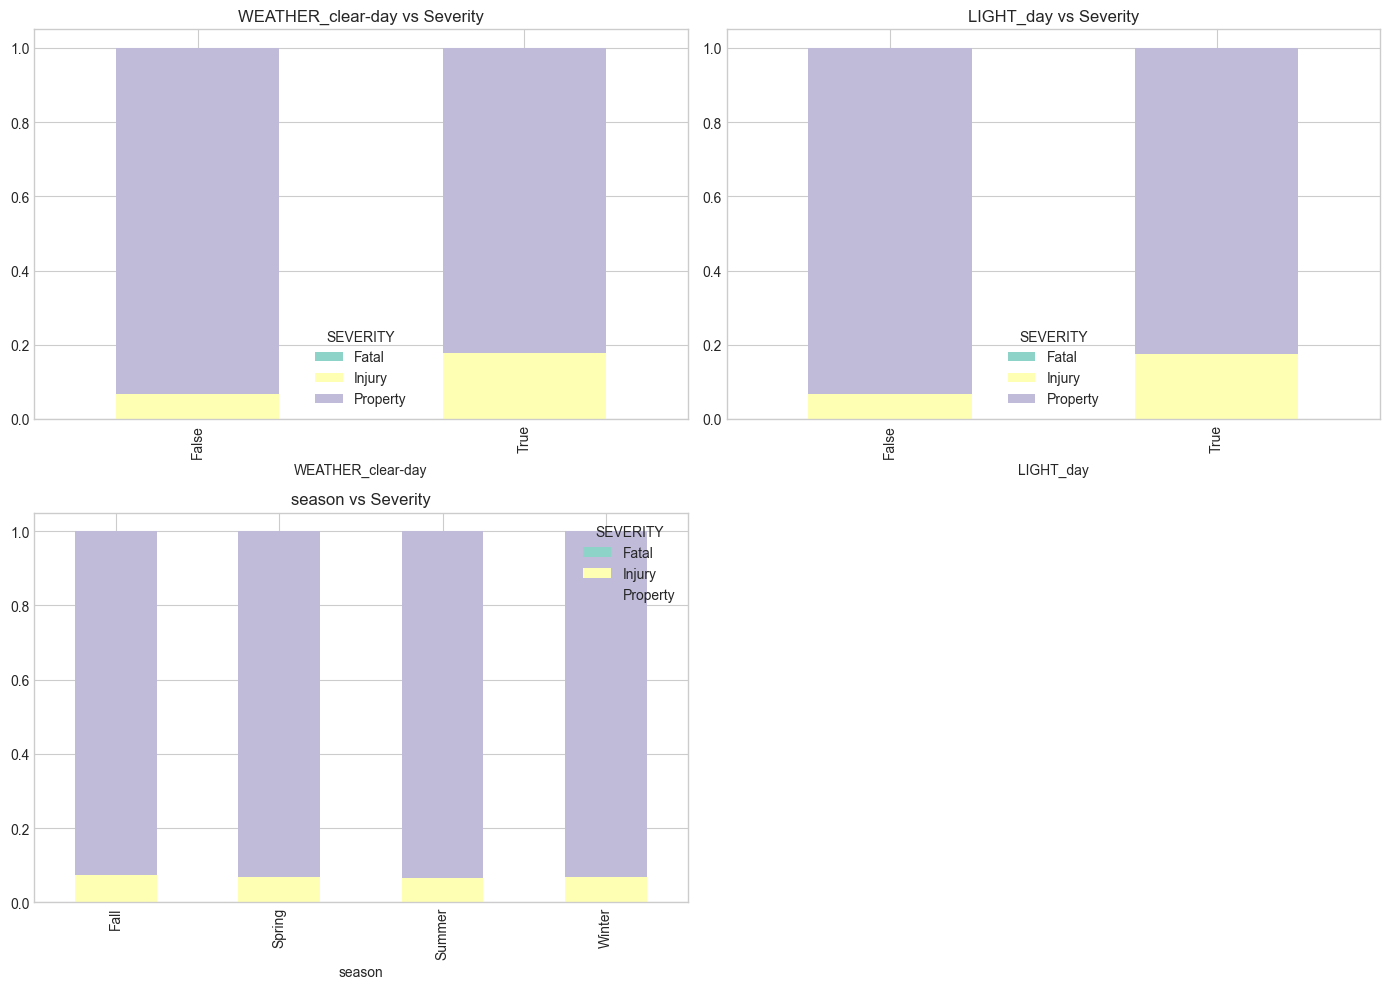

In [15]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['WEATHER_clear-day', 'LIGHT_day', 'season'], 1):  # Use correct column names
    plt.subplot(2, 2, i)
    ct = pd.crosstab(df[col], df['SEVERITY'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs Severity')
plt.tight_layout()
plt.show()

**Observations:**
- Proportion of severe vs non-severe by category.
- Highlight categories with high risk.